In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [5]:
df.head(9)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3


- 1 = Basic Service
- 2 = E-Service
- 3 = Plus Service 
- 4 = Total Service


In [6]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

<Axes: xlabel='age', ylabel='income'>

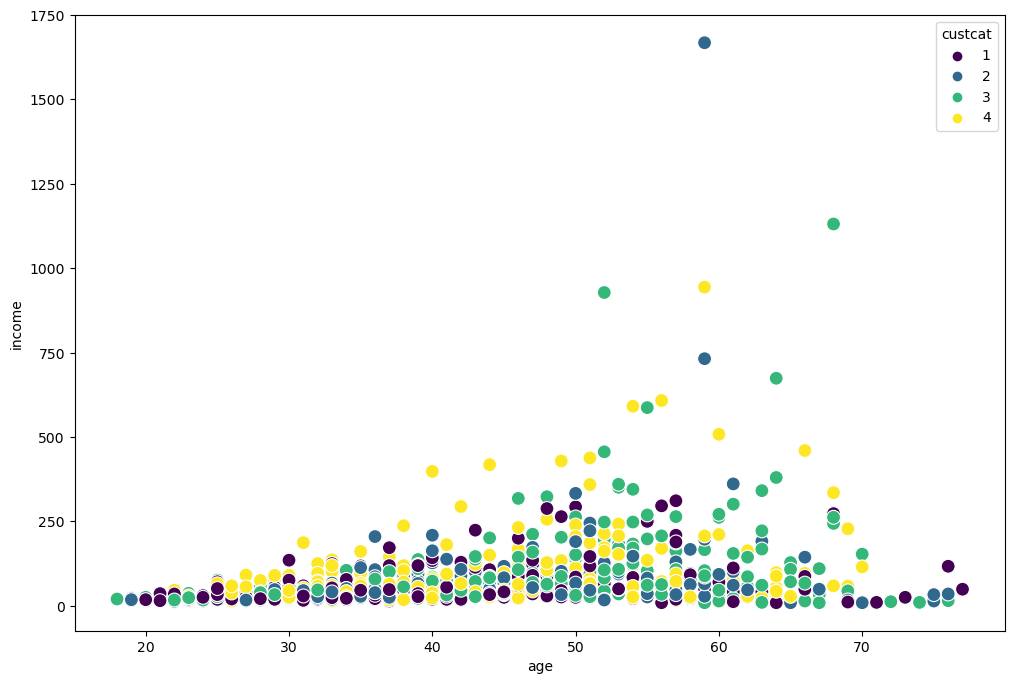

In [7]:
# age ,income 
plt.figure(figsize=(12,8))
sns.scatterplot(x='age',y='income',hue='custcat',data=df,palette='viridis',s=100)

1- Pick a value for K. 2- Calculate the distance of unknown case from all cases. (dissimilarity) 3- Select the K-observations in the training data that are "nearest" to the unknown data point. 4- Predict the response of the unknown data point, using the most popular response value from the K-nearest neigbors.

For unknown case, first pick K=1 Calculate and make prediction until K=20 Compare results.

- K=1 may capture the noise in data. A low value of K causes over-fitting. Prediction is not good enough for out-of-sample cases. 
- K=20 The model becomes overly generalized, if value of K is too high.
- If we use 2 features (age, income), we are using it in a 2-dimensional space.
- We can also use the same distance matrix for multi-dimensional vectors.
# Exercise

- Normalize the data: StandardScaler
- Classification: KNeighborsClassifier
- Training: k = 4
- Evaluation: accuracy_score()

In [20]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']]
y= df['custcat']

In [21]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.neighbors import KNeighborsClassifier


k = 4
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [25]:
from sklearn.metrics import accuracy_score


y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the KNeighborsClassifier with k={k}: {accuracy:.4f}')

Accuracy of the KNeighborsClassifier with k=4: 0.3150


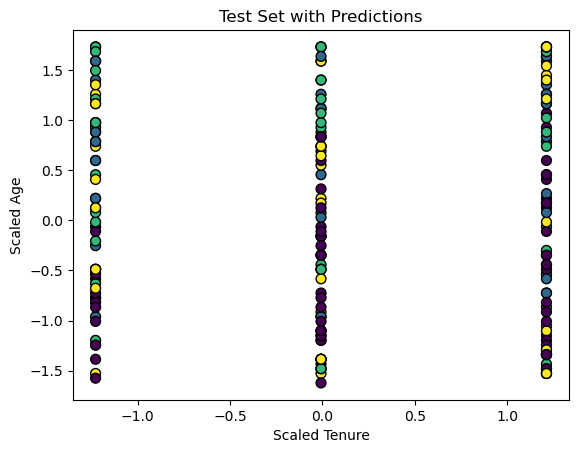

In [26]:
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='viridis', edgecolor='k', s=50)
plt.title('Test Set with Predictions')
plt.xlabel('Scaled Tenure')
plt.ylabel('Scaled Age')
plt.show()